   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
Accuracy: 0.9723

Confusion Matrix:
 [[18300     0]
 [  554  1146]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       1.00      0.67      0.81      1700

    accuracy                

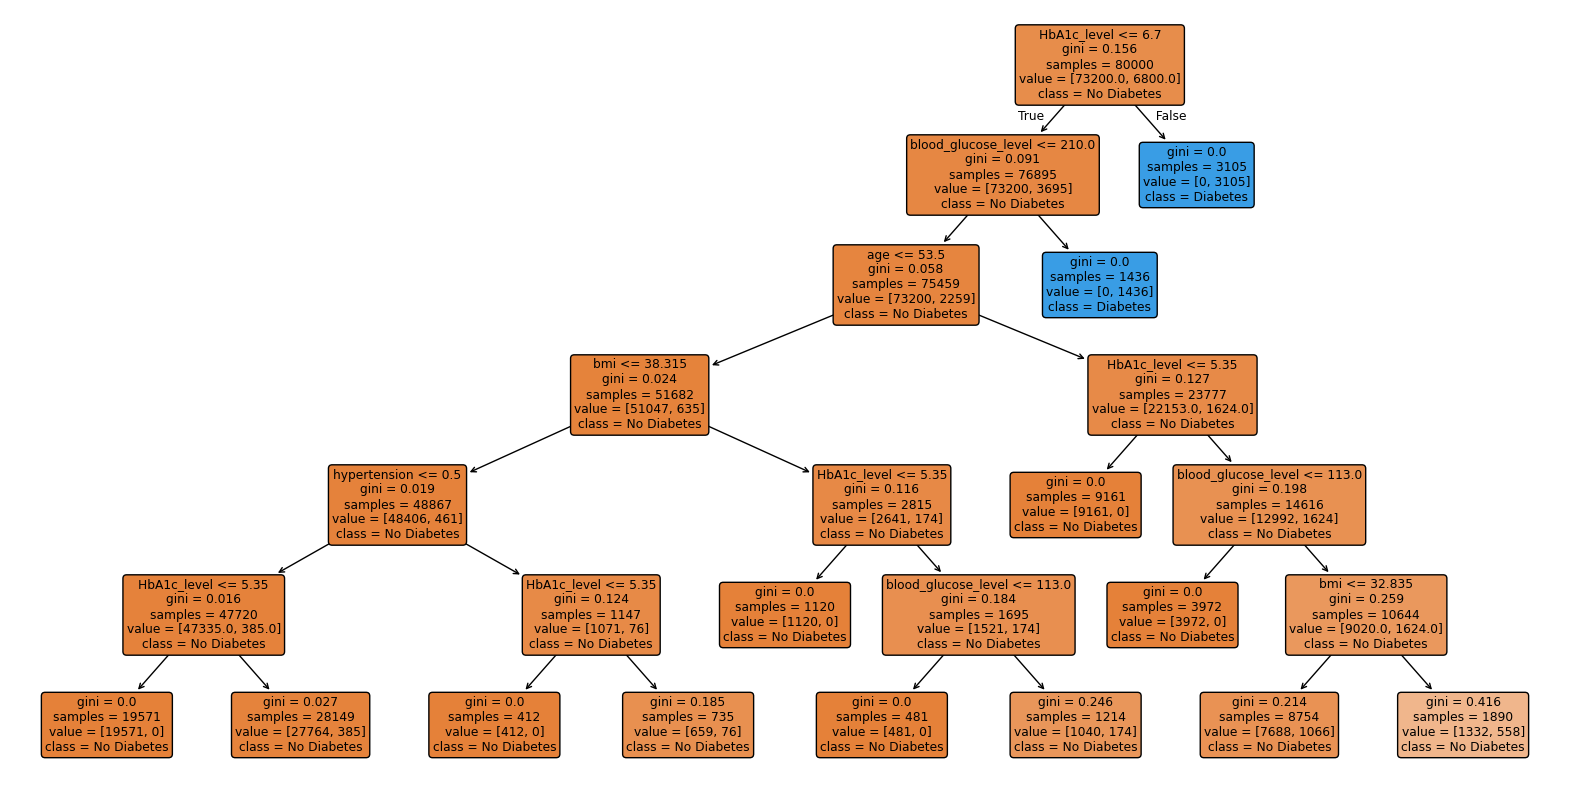

In [1]:
# -----------------------------
# 1. Import Libraries
# -----------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# -----------------------------
# 2. Load Dataset
# -----------------------------
# Load Kaggle Diabetes dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

print(df.head())

# -----------------------------
# 3. Features & Target
# -----------------------------
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

# Convert categorical columns to numeric
X = pd.get_dummies(X, drop_first=True)

# -----------------------------
# 4. Split into Train/Test
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 5. Train Decision Tree
# -----------------------------
dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth=6,
    random_state=42
)

dt.fit(X_train, y_train)

# -----------------------------
# 6. Predict & Evaluate
# -----------------------------
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -----------------------------
# 7. Plot Decision Tree
# -----------------------------
plt.figure(figsize=(20,10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["No Diabetes", "Diabetes"],
    filled=True,
    rounded=True
)
plt.show()

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 

In [19]:
# Train a Decision Tree with Bagging: bootstrap= True

bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=10,
    max_samples=0.8,   # 80% samples
    bootstrap=True,    # Bagging (with replacement)
    random_state=42
)

bagging_model.fit(X_train, y_train)

y_pred = bagging_model.predict(X_test)

print("Bagging Accuracy:", accuracy_score(y_test, y_pred))


Bagging Accuracy: 0.9695


In [20]:
# Train a Decision Tree with Bagging: bootstrap= False

bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=10,
    max_samples=0.8,   # 80% samples
    bootstrap=False,    # Bagging (with replacement)
    random_state=42
)

bagging_model.fit(X_train, y_train)

y_pred = bagging_model.predict(X_test)

print("Bagging Accuracy:", accuracy_score(y_test, y_pred))

Bagging Accuracy: 0.9651


In [21]:
#Practice Random Forest 

rf_model = RandomForestClassifier(n_estimators=50, random_state=42) 
rf_model.fit(X_train, y_train) 
y_pred = rf_model.predict(X_test) 
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.97045


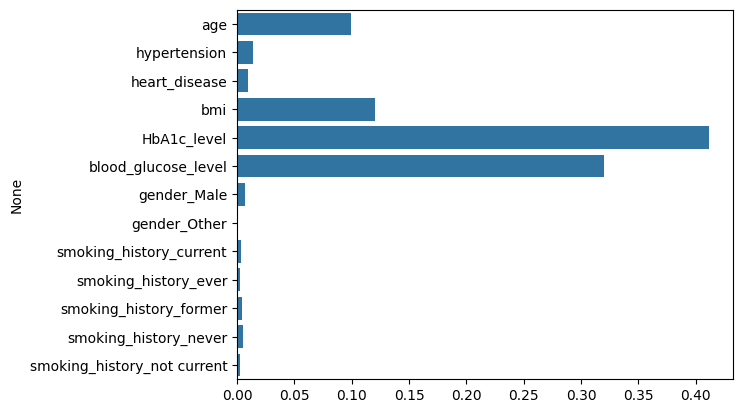

In [22]:
#Plot feature importance:

importances = rf_model.feature_importances_ 
sns.barplot(x=importances, y=X.columns) 
plt.show() 

In [14]:
# Practice Boosting 
# AdaBoost: 

ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=50,
    learning_rate=1,
    random_state=42
)

ada_model.fit(X_train, y_train)

y_pred = ada_model.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Accuracy: 0.9723


In [15]:
# Gradient Boosting: 

gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, 
random_state=42) 
gb_model.fit(X_train, y_train) 
y_pred = gb_model.predict(X_test) 
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred)) 

Gradient Boosting Accuracy: 0.9723


In [23]:
# Practice Voting 

voting_model = VotingClassifier( 
    estimators=[ 
        ('lr', LogisticRegression(max_iter=1000)), 
        ('dt', DecisionTreeClassifier()), 
        ('rf', RandomForestClassifier(n_estimators=50)) 
    ], 
    voting='hard'  # try 'soft' as well 
) 
voting_model.fit(X_train, y_train) 
y_pred = voting_model.predict(X_test) 
print("Voting Accuracy:", accuracy_score(y_test, y_pred)) 

Voting Accuracy: 0.9688


In [24]:
# Practice Stacking 

from sklearn.ensemble import StackingClassifier 
stack_model = StackingClassifier( 
    estimators=[ 
        ('lr', LogisticRegression(max_iter=1000)), 
        ('rf', RandomForestClassifier(n_estimators=50)), 
        ('dt', DecisionTreeClassifier()) 
    ], 
    final_estimator=GradientBoostingClassifier(n_estimators=50), 
) 
stack_model.fit(X_train, y_train) 
y_pred = stack_model.predict(X_test) 
print("Stacking Accuracy:", accuracy_score(y_test, y_pred))

Stacking Accuracy: 0.97215


In [25]:
# Model Accuracy Comparison

# Accuracy results
model_results = {
    "Model": [
        "Bagging (Bootstrap = True)",
        "Bagging (Bootstrap = False)",
        "Random Forest",
        "AdaBoost",
        "Gradient Boosting",
        "Voting Classifier",
        "Stacking Classifier"
    ],
    "Accuracy": [
        0.9695,
        0.9651,
        0.97045,
        0.9723,
        0.9723,
        0.9688,
        0.97215
    ]
}

# Create DataFrame
results_df = pd.DataFrame(model_results)

# Sort by Accuracy (optional, for better presentation)
results_df = results_df.sort_values(by="Accuracy", ascending=False)

print(results_df)

                         Model  Accuracy
3                     AdaBoost   0.97230
4            Gradient Boosting   0.97230
6          Stacking Classifier   0.97215
2                Random Forest   0.97045
0   Bagging (Bootstrap = True)   0.96950
5            Voting Classifier   0.96880
1  Bagging (Bootstrap = False)   0.96510


1.AdaBoost and Gradient Boosting achieved the highest accuracy (0.9723), closely followed by Stacking (0.9722).
This indicates that boosting-based methods are particularly effective for this diabetes dataset, as they focus on 
correcting previous prediction errors.

2.Difference between Bagging and Boosting

Bagging (e.g., Bagging, Random Forest) trains multiple models independently on different random samples and reduces variance.

Boosting (e.g., AdaBoost, Gradient Boosting) trains models sequentially, where each new model focuses more on previously misclassified samples, reducing bias and variance.
👉 This explains why boosting models slightly outperformed bagging models.

3.Advantages of Stacking

Combines different types of models (e.g., trees, boosting, linear models).

A meta-learner learns how to best combine predictions.

Often achieves higher and more stable performance than individual models.

Particularly useful when base models capture different patterns in the data

Short Summary 

Boosting-based models (AdaBoost and Gradient Boosting) achieved the highest accuracy on the diabetes dataset, 
outperforming bagging and voting methods. Bagging reduces variance by training models independently, 
while boosting improves performance by focusing on hard-to-classify instances. Stacking leverages the strengths of multiple 
diverse models through a meta-learner, resulting in competitive and robust performance close to the best individual models.